In [ ]:
import tensorflow as tf

In [ ]:
len(tf.config.list_physical_devices("GPU"))>0

2.10.0


True

In [ ]:
pip install pypdf


In [ ]:
pip install nltk

In [ ]:
pip install --upgrade PyPDF2

In [ ]:
import nltk
nltk.download('punkt')
nltk.download()

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords

import nltk; nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu'])

In [ ]:
from pypdf import PdfReader

reader = PdfReader("C:/Users/Medhansh/Desktop/NLP Project/Gale Encyclopedia of Medicine/Gale Encyclopedia of Medicine Vol. 1 (A-B).pdf")
book_1 = ""
start_page = 14   # 0-based index, so the 15th page

for page_num, page in enumerate(reader.pages):
    if page_num >= start_page:
        book_1 += page.extract_text() + " "

In [ ]:
from pypdf import PdfReader

reader = PdfReader("C:/Users/Medhansh/Desktop/NLP Project/Gale Encyclopedia of Medicine/Gale Encyclopedia of Medicine Vol. 2 (C-F).pdf")
book_2 = ""
start_page = 13   # 0-based index, so the 15th page
for page_num, page in enumerate(reader.pages):
    if page_num >= start_page:
        book_2 += page.extract_text() + " "

In [ ]:
from pypdf import PdfReader

reader = PdfReader("C:/Users/Medhansh/Desktop/NLP Project/Gale Encyclopedia of Medicine/Gale Encyclopedia of Medicine Vol. 3 (G-M).pdf")
book_3 = ""
start_page = 13   # 0-based index, so the 15th page
for page_num, page in enumerate(reader.pages):
    if page_num >= start_page:
        book_3 += page.extract_text() + " "

In [ ]:
from pypdf import PdfReader

reader = PdfReader("C:/Users/Medhansh/Desktop/NLP Project/Gale Encyclopedia of Medicine/Gale Encyclopedia of Medicine Vol. 4 (N-S).pdf")
book_4 = ""
start_page = 13   # 0-based index, so the 15th page
for page_num, page in enumerate(reader.pages):
    if page_num >= start_page:
        book_4 += page.extract_text() + " "

In [ ]:
from pypdf import PdfReader

reader = PdfReader("C:/Users/Medhansh/Desktop/NLP Project/Gale Encyclopedia of Medicine/Gale Encyclopedia of Medicine Vol. 5 (T-Z).pdf")
book_5 = ""
start_page = 13   # 0-based index, so the 15th page
for page_num, page in enumerate(reader.pages):
    if page_num >= start_page:
        book_5 += page.extract_text() + " "

In [ ]:
def split_into_paragraphs(text, lines_per_paragraph=8):

    paragraphs = []

    current_paragraph = []
    lines_in_current_paragraph = 0

    for line in text.split("\n"):
        current_paragraph.append(line)
        lines_in_current_paragraph += 1

        if lines_in_current_paragraph == lines_per_paragraph:
            paragraphs.append(current_paragraph)
            current_paragraph = []
            lines_in_current_paragraph = 0

    # Add the remaining lines in the current paragraph to the list of paragraphs.
    if current_paragraph:
        paragraphs.append(current_paragraph)

    return paragraphs


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def text_preprocessing(text):
    # Remove non-ASCII characters
    text = ''.join([c if ord(c) < 128 else ' ' for c in text])

    # Remove Roman numerals using a regular expression
    text = re.sub(r'\b[IVXLCDM]+(?:\s+[ivxlcdm]+)?\b', '', text)  # Remove lowercase Roman numerals

    # Convert to lowercase
    text = text.lower()
    text = text.replace('“', '')
    text = text.replace('”', '')
    text = text.replace('’', '')
    text = text.replace('\n', ' ').replace('-', ' ')
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r',+', ',  ,', text)

    # Tokenize the text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)

    return text

def preprocess_paragraphs(paragraphs):
    preprocessed_paragraphs = []
    for paragraph in paragraphs:
        preprocessed_paragraph = [text_preprocessing(line) for line in paragraph]
        preprocessed_paragraphs.append(preprocessed_paragraph)
    return preprocessed_paragraphs


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Medhansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Medhansh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
book_final = (book_1)
# + " " + book_2+ " " + book_3 + " " + book_4 )
              # +" "+ book_5)
combined_text= book_final

In [ ]:
book_pre = text_preprocessing(combined_text)

In [ ]:
book_pre

'abdominal aorta ultrasound seeabdominal ultrasound abdominal aortic aneurysm seeaortic aneurysm abdominal hernia seehernia abdominal thrust seeheimlich maneuver abdominal ultrasound definition ultrasound technology allows doctors see inside patient without resorting surgery transmit ter sends high frequency sound waves bodywhere bounce different tissues organs toproduce distinctive pattern echoes receiver hears returning echo pattern forwards acomputer translates data image atelevision screen ultrasound distinguishsubtle variations soft fluid filled tissues isparticularly useful providing diagnostic images theabdomen ultrasound also used treatment purpose potential medical applications ultrasound first recognized outgrowth thesonar technology developed detect submarines duringworld war first useful medical images pro duced early ultrasound quali ty improved point came generalmedical use improvements technology applica tion interpretation ultrasound continue lowcost versatility safety 

In [ ]:
# from nltk.tokenize import word_tokenize
book_token = word_tokenize(book_pre)

In [ ]:
book_token[:5]

['abdominal', 'aorta', 'ultrasound', 'seeabdominal', 'ultrasound']

In [ ]:
combined_text[:5]

'Abdom'

In [ ]:
paragraphs = split_into_paragraphs(combined_text, lines_per_paragraph=8)

In [ ]:
paragraphs

[['Abdominal aorta ultrasound seeAbdominal',
  'ultrasound',
  'Abdominal aortic aneurysm seeAortic',
  'aneurysm',
  'Abdominal hernia seeHernia',
  'Abdominal thrust seeHeimlich maneuver',
  'Abdominal ultrasound',
  'Definition'],
 ['Ultrasound technology allows doctors to “see”',
  'inside a patient without resorting to surgery. A transmit-ter sends high frequency sound waves into the body,where they bounce off the different tissues and organs toproduce a distinctive pattern of echoes. A receiver“hears” the returning echo pattern and forwards it to acomputer, which translates the data into an image on atelevision screen. Because ultrasound can distinguishsubtle variations between soft, fluid-filled tissues, it isparticularly useful in providing diagnostic images of theabdomen. Ultrasound can also be used in treatment.',
  'Purpose',
  'The potential medical applications of ultrasound',
  'were first recognized in the 1940s as an outgrowth of thesonar technology developed to detect 

In [ ]:

preprocessed_paragraphs = preprocess_paragraphs(paragraphs)

In [ ]:
preprocessed_paragraphs

[['abdominal aorta ultrasound seeabdominal',
  'ultrasound',
  'abdominal aortic aneurysm seeaortic',
  'aneurysm',
  'abdominal hernia seehernia',
  'abdominal thrust seeheimlich maneuver',
  'abdominal ultrasound',
  'definition'],
 ['ultrasound technology allows doctors see',
  'inside patient without resorting surgery transmit ter sends high frequency sound waves bodywhere bounce different tissues organs toproduce distinctive pattern echoes receiver hears returning echo pattern forwards acomputer translates data image atelevision screen ultrasound distinguishsubtle variations soft fluid filled tissues isparticularly useful providing diagnostic images theabdomen ultrasound also used treatment',
  'purpose',
  'potential medical applications ultrasound',
  'first recognized outgrowth thesonar technology developed detect submarines duringworld war first useful medical images pro duced early ultrasound quali ty improved point came generalmedical use improvements technology applica tion

In [ ]:
def tokenize(docs):


  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)



In [ ]:
import gensim
tokenized_docs = tokenize(book_token)

In [ ]:
tokenized_docs

[['abdominal'],
 ['aorta'],
 ['ultrasound'],
 ['seeabdominal'],
 ['ultrasound'],
 ['abdominal'],
 ['aortic'],
 ['aneurysm'],
 ['seeaortic'],
 ['aneurysm'],
 ['abdominal'],
 ['hernia'],
 ['seehernia'],
 ['abdominal'],
 ['thrust'],
 ['seeheimlich'],
 ['maneuver'],
 ['abdominal'],
 ['ultrasound'],
 ['definition'],
 ['ultrasound'],
 ['technology'],
 ['allows'],
 ['doctors'],
 ['see'],
 ['inside'],
 ['patient'],
 ['without'],
 ['resorting'],
 ['surgery'],
 ['transmit'],
 ['ter'],
 ['sends'],
 ['high'],
 ['frequency'],
 ['sound'],
 ['waves'],
 ['bodywhere'],
 ['bounce'],
 ['different'],
 ['tissues'],
 ['organs'],
 ['toproduce'],
 ['distinctive'],
 ['pattern'],
 ['echoes'],
 ['receiver'],
 ['hears'],
 ['returning'],
 ['echo'],
 ['pattern'],
 ['forwards'],
 ['acomputer'],
 ['translates'],
 ['data'],
 ['image'],
 ['atelevision'],
 ['screen'],
 ['ultrasound'],
 [],
 ['variations'],
 ['soft'],
 ['fluid'],
 ['filled'],
 ['tissues'],
 ['isparticularly'],
 ['useful'],
 ['providing'],
 ['diagnostic']

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import pyLDAvis
import pyLDAvis.gensim_models


id2word = corpora.Dictionary(tokenized_docs)

texts =tokenized_docs

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

[[('abdominal', 1)],
 [('aorta', 1)],
 [('ultrasound', 1)],
 [('seeabdominal', 1)],
 [('ultrasound', 1)],
 [('abdominal', 1)],
 [('aortic', 1)],
 [('aneurysm', 1)],
 [('seeaortic', 1)],
 [('aneurysm', 1)],
 [('abdominal', 1)],
 [('hernia', 1)],
 [('seehernia', 1)],
 [('abdominal', 1)],
 [('thrust', 1)],
 [('seeheimlich', 1)],
 [('maneuver', 1)],
 [('abdominal', 1)],
 [('ultrasound', 1)],
 [('definition', 1)],
 [('ultrasound', 1)],
 [('technology', 1)],
 [('allows', 1)],
 [('doctors', 1)],
 [('see', 1)],
 [('inside', 1)],
 [('patient', 1)],
 [('without', 1)],
 [('resorting', 1)],
 [('surgery', 1)],
 [('transmit', 1)],
 [('ter', 1)],
 [('sends', 1)],
 [('high', 1)],
 [('frequency', 1)],
 [('sound', 1)],
 [('waves', 1)],
 [('bodywhere', 1)],
 [('bounce', 1)],
 [('different', 1)],
 [('tissues', 1)],
 [('organs', 1)],
 [('toproduce', 1)],
 [('distinctive', 1)],
 [('pattern', 1)],
 [('echoes', 1)],
 [('receiver', 1)],
 [('hears', 1)],
 [('returning', 1)],
 [('echo', 1)],
 [('pattern', 1)],
 

In [ ]:
topic_model = gensim.models.ldamulticore.LdaMulticore(
  corpus=corpus,   # Document-Term Matrix
  id2word=id2word,  # Map word IDs to words
  num_topics=10,    # Number of latent topics to extract (adjust as needed)
  random_state=100,
  passes=150,     # Number of passes through the corpus during training
  workers=10,       # Number of worker processes to use (1 for CPU, >1 for GPU)

)

In [ ]:
topic_model.save(r'C:\Users\Medhansh\Desktop\NLP Project\lda__updated_final_model')

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=topic_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.7969631840963685


In [ ]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create a list to store coherence scores
coherence_scores = []

# Define a range of topic numbers to try
topics_range = range(2, 15)  # Adjust the range as needed

for num_topics in topics_range:
    # Create a new LdaMulticore model with the desired number of topics
    topic_model = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=100,
        passes=100,
        workers=10
    )

    # Calculate the coherence score
    coherence_model_lda = CoherenceModel(model=topic_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    coherence_scores.append(coherence_score)




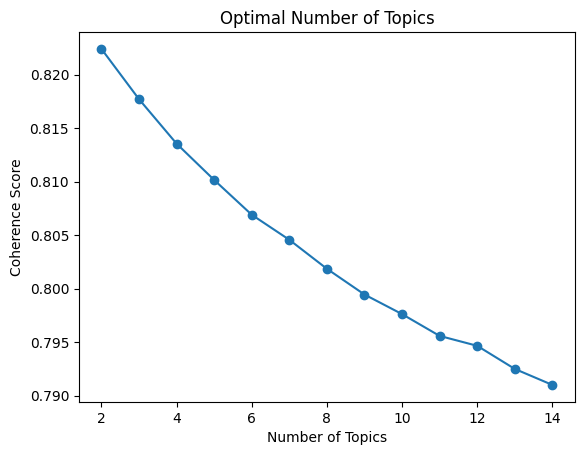

In [ ]:
# Plot the elbow plot
plt.plot(topics_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

In [ ]:
 ## Visualize with pyLDAvis
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(
  topic_model,
  corpus,
  id2word,
  mds="mmds",

  R=25)

visualization

C:\Users\Medhansh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.331942  0.225708       1        1  10.471379
0      0.099358  0.372627       2        1  10.166788
7     -0.288281 -0.211306       3        1  10.030338
1     -0.216623  0.357260       4        1  10.017929
6      0.164819 -0.371555       5        1   9.960893
9     -0.144161  0.132683       6        1   9.938964
8     -0.099554 -0.356587       7        1   9.874915
4     -0.407784  0.015045       8        1   9.868003
3      0.160456 -0.075379       9        1   9.859406
5      0.399828 -0.088496      10        1   9.811385, topic_info=          Term         Freq        Total Category  logprob  loglift
298        may  2854.000000  2854.000000  Default  25.0000  25.0000
271      blood  2102.000000  2102.000000  Default  24.0000  24.0000
59        also  1306.000000  1306.000000  Default  23.0000  23.0000
233   medicine  1265.000000  1265.000000  Default  22.0000  22.0000
1272     drugs  1250.000000  1250.000000  Default  21.0000  21.0000
...        ...          ...          ...      ...      ...      ...
297     injury   178.909170   179.878115  Topic10  -4.8721   2.3162
1940     group   160.424518   161.393462  Topic10  -4.9812   2.3156
1860       day   159.809255   160.778199  Topic10  -4.9850   2.3156
922      areas   152.507318   153.476262  Topic10  -5.0318   2.3153
1012   related   146.533123   147.502067  Topic10  -5.0718   2.3150

[275 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
223       8  0.997970  abnormal
1834      9  0.996048      acid
155       2  0.993555     acute
3117      4  0.992166    affect
2596      8  0.994628  affected
...     ...       ...       ...
664       2  0.996508    within
19        3  0.995900   without
1350     10  0.997372     women
3078      2  0.993336     years
1096      1  0.996125      york

[250 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 8, 2, 7, 10, 9, 5, 4, 6])

In [ ]:

for topic_num in range(topic_model.num_topics):
    words = topic_model.show_topic(topic_num)

    print(f"Topic {topic_num + 1}: {words}")


Topic 1: [('disease', 0.04755173), ('symptoms', 0.038984638), ('gale', 0.02713674), ('bone', 0.021735359), ('use', 0.021687869), ('called', 0.018842671), ('tissue', 0.015923264), ('tests', 0.01523495), ('pressure', 0.014798857), ('definition', 0.012586806)]
Topic 2: [('heart', 0.033898115), ('page', 0.029078787), ('one', 0.028126117), ('problems', 0.020583505), ('cancer', 0.019199492), ('person', 0.018500838), ('two', 0.017274605), ('health', 0.015454318), ('disorders', 0.014875254), ('area', 0.013979227)]
Topic 3: [('may', 0.11443081), ('pm', 0.025149032), ('test', 0.020360297), ('physician', 0.019708682), ('ed', 0.018953815), ('taking', 0.015921652), ('disorder', 0.014385549), ('cases', 0.013472314), ('liver', 0.013130994), ('condition', 0.012901345)]
Topic 4: [('treatment', 0.04945139), ('people', 0.025941065), ('diagnosis', 0.020523287), ('new', 0.018045835), ('tion', 0.015896194), ('using', 0.014218755), ('form', 0.012494941), ('diseases', 0.012091114), ('large', 0.01119629), ('be

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel, corpus,texts):
    # Init output
    rows = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                rows.append([int(topic_num), round(prop_topic, 4), topic_keywords])

    sent_topics_df = pd.DataFrame(rows, columns=['Dominant_Topic', 'Perc_Contribution','Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=topic_model, corpus=corpus,texts =preprocessed_paragraphs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Dominant_NO','Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Texts']

# Save to CSV# Save to CSV in the desired directory





In [ ]:
df_dominant_topic

,Dominant_NO,Dominant_Topic,Topic_Perc_Contrib,Keywords,Texts
0,0,6,0.5500,"blood, patients, cause, pain, usually, medical...","[abdominal aorta ultrasound seeabdominal, ultr..."
1,1,4,0.5500,"patient, cells, causes, surgery, type, muscle,...","[ultrasound technology allows doctors see, ins..."
2,2,5,0.5500,"effects, include, system, procedure, treat, ch...",[warranted patients afflicted chronic acuteabd...
3,3,1,0.5463,"heart, page, one, problems, cancer, person, tw...","[abdominal mass abnormal growths tumors cysts,..."
4,4,5,0.5500,"effects, include, system, procedure, treat, ch...","[pancreatic disease inflammation malformation,..."
...,...,...,...,...,...
243124,243124,8,0.5500,"medicine, drugs, skin, infection, often, thera...",NaN
243125,243125,5,0.1000,"effects, include, system, procedure, treat, ch...",NaN
243126,243126,0,0.1000,"disease, symptoms, gale, bone, use, called, ti...",NaN
243127,243127,2,0.5500,"may, pm, test, physician, ed, taking, disorder...",NaN


In [ ]:
csv_file_path = r'C:\Users\Medhansh\Desktop\NLP Project\dominant_topic_updated_5.csv'
df_dominant_topic.to_csv(csv_file_path, sep=',')

In [ ]:
##############################################################################################################################

In [ ]:
from gensim.models import LdaModel

# Replace 'path_to_model' with the actual path to your saved model file
path_to_model = r'C:\Users\Medhansh\Desktop\NLP Project\lda_updated_model'


# Load the LDA model from the saved file
loaded_model = LdaModel.load(path_to_model)

# Now 'loaded_model' contains your LDA model


In [ ]:
pyLDAvis.save_html(visualization, r'C:\Users\Medhansh\Desktop\NLP Project\lda_visualization_updated.html')

In [ ]:
import webbrowser

# Replace 'path_to_html_file' with the actual path to your HTML file
path_to_html_file = r'C:\Users\Medhansh\Desktop\NLP Project\lda_visualization_updated.html'

# Open the HTML file in the default web browser
webbrowser.open('file://' + path_to_html_file)


In [ ]:
# Assuming you've already loaded the model as 'loaded_model'
# Replace the number of topics as needed in the range()

for topic_num in range(loaded_model.num_topics):
    words = loaded_model.show_topic(topic_num)
    print(f"Topic {topic_num + 1}: {words}")


In [ ]:
# Your mapping of Dominant_Topic numbers to labels
topic_labels = {
    0: "Symptoms, Tests, Pressure",
    1: "Heart, Cancer, Health",
    2: "Test, Physician, Liver",
    3: "Treatment, Diagnosis, Diseases",
    4: "Patient, Causes, Surgery",
    5: "Effects, Procedure, Children",
    6: "Blood, Patients, Pain",
    7: "Anxiety, Conditions, Levels",
    8: "Medicine, Infection, Therapy",
    9: "Drug, Brain, Child"
}

# Assuming df_dominant_topic is your DataFrame with 'Dominant_Topic' column

# Create a new 'Topic_Label' column by mapping Dominant_Topic to labels
df_dominant_topic['Topic_Label'] = df_dominant_topic['Dominant_Topic'].map(topic_labels)

# Now, your DataFrame df_dominant_topic will have a 'Topic_Label' column with the labels based on the 'Dominant_Topic' column.


In [ ]:
df_dominant_topic

,Dominant_NO,Dominant_Topic,Topic_Perc_Contrib,Keywords,Texts,Topic_Label
0,0,6,0.5500,"blood, patients, cause, pain, usually, medical...","[abdominal aorta ultrasound seeabdominal, ultr...","Blood, Patients, Pain"
1,1,4,0.5500,"patient, cells, causes, surgery, type, muscle,...","[ultrasound technology allows doctors see, ins...","Patient, Causes, Surgery"
2,2,5,0.5500,"effects, include, system, procedure, treat, ch...",[warranted patients afflicted chronic acuteabd...,"Effects, Procedure, Children"
3,3,1,0.5463,"heart, page, one, problems, cancer, person, tw...","[abdominal mass abnormal growths tumors cysts,...","Heart, Cancer, Health"
4,4,5,0.5500,"effects, include, system, procedure, treat, ch...","[pancreatic disease inflammation malformation,...","Effects, Procedure, Children"
...,...,...,...,...,...,...
243124,243124,8,0.5500,"medicine, drugs, skin, infection, often, thera...",NaN,"Medicine, Infection, Therapy"
243125,243125,5,0.1000,"effects, include, system, procedure, treat, ch...",NaN,"Effects, Procedure, Children"
243126,243126,0,0.1000,"disease, symptoms, gale, bone, use, called, ti...",NaN,"Symptoms, Tests, Pressure"
243127,243127,2,0.5500,"may, pm, test, physician, ed, taking, disorder...",NaN,"Test, Physician, Liver"


In [ ]:
df_dominant_topic.isnull().sum()

Dominant_NO                0
Dominant_Topic             0
Topic_Perc_Contrib         0
Keywords                   0
Texts                 239774
Topic_Label                0
dtype: int64

In [ ]:
df_dominant_topic = df_dominant_topic.dropna()

In [ ]:
df_dominant_topic.isnull().sum()

Dominant_NO           0
Dominant_Topic        0
Topic_Perc_Contrib    0
Keywords              0
Texts                 0
Topic_Label           0
dtype: int64

In [ ]:
csv_file_path = r'C:\Users\Medhansh\Desktop\NLP Project\dominant_topic_updated_6.csv'
df_dominant_topic.to_csv(csv_file_path, sep=',')

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Load your data (replace 'your_dataset.csv' with the actual path to your CSV file)
dataset_path = "C:/Users/Medhansh/Desktop/NLP Project/dominant_topic_updated_6.csv"
dominant_df = pd.read_csv(dataset_path)

# Extract text and labels
X = dominant_df['Texts']
y = dominant_df['Topic_Label']

# Convert the Pandas Series to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the pre-trained DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(y)))

# Tokenize the input data
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt')
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')

# Create PyTorch tensors for labels
y_train = torch.tensor(list(y_train))
y_test = torch.tensor(list(y_test))

# Define batch size and create DataLoader
batch_size = 8
train_data = torch.utils.data.TensorDataset(X_train_encodings['input_ids'], X_train_encodings['attention_mask'], y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

# Fine-tune the model
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=batch_size,
    output_dir='./results',
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
)

trainer.train()

# Evaluate the fine-tuned model
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')
y_pred = trainer.predict(X_test_encodings['input_ids'], X_test_encodings['attention_mask']).predictions.argmax(axis=1)
y_pred = y_pred.tolist()
y_test = y_test.tolist()

# Convert model outputs to labels
predicted_labels = [trainer.model.config.id2label[label] for label in y_pred]
true_labels = [trainer.model.config.id2label[label] for label in y_test]

# Evaluate the classifier
classification_rep = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(classification_rep)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: too many dimensions 'str'

In [ ]:

!pip install transformers scikit-learn pandas numpy torch



In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as p

# Load your data (replace 'your_dataset.csv' with the actual path to your CSV file)
dataset_path = "C:/Users/Medhansh/Desktop/NLP Project/dominant_topic_updated_6.csv"
dominant_df = pd.read_csv(dataset_path)


In [ ]:
# Extract text and labels
X = dominant_df['Texts']
y = dominant_df['Topic_Label']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the pre-trained DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(y)))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize the input data using Python lists
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='pt')
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='pt')

# Create PyTorch tensors for labels

In [ ]:
y_train = torch.tensor(list(y_train))
y_test = torch.tensor(list(y_test))

In [ ]:
batch_size = 8
train_data = torch.utils.data.TensorDataset(X_train_encodings['input_ids'], X_train_encodings['attention_mask'], y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=batch_size,
    output_dir='./results',
    num_train_epochs=3,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
)


In [ ]:
trainer.train()

TypeError: vars() argument must have __dict__ attribute

In [ ]:
!pip install --upgrade transformers


  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/c1/bd/f64d67df4d3b05a460f281defe830ffab6d7940b7ca98ec085e94e024781/transformers-4.34.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/121.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/121.5 kB ? eta -:--:--
     --------- --------------------------- 30.7/121.5 kB 445.2 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/121.5 kB 469.7 kB/s eta 0:00:01
     --------------------------------- -- 112.6/121.5 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 121.5/121.5 kB 650.9 kB/s eta 0:00:00
  Obtaining dependency information for tokenizers<0.15,>=0.14 from https://files.pythonhosted.org/packages/36/de/de1b1d7b191821cc2e6e84251cf9641e4fbd205fa5ec816d52fe42f97325/tokenizers-0.14.1-cp39-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   --------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Medhansh\\miniconda3\\envs\\tensorflow\\Lib\\site-packages\\~okenizers\\tokenizers.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

# Load your dataset
df =  pd.read_csv("C:/Users/Medhansh/Desktop/NLP Project/dominant_topic_updated_6.csv")

# Define your feature (X) and target (y)
X = df['Texts']
y = [labels.split(', ') for labels in df['Topic_Label']]  # Assumes that labels are separated by ', '

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the target labels into a binary format
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)

# Tokenize the text data
max_words = 10000  # You can adjust this value
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200  # You can adjust this value
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Create a deep learning model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(len(mlb.classes_), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_bin, epochs=300,batch_size=32)

# Make multi-label predictions on the test set
y_pred_bin = model.predict(X_test_padded)

# Apply a threshold to convert probabilities to binary labels
threshold = 0.5
y_pred_bin = (y_pred_bin > threshold).astype(int)

# Calculate accuracy and provide a classification report
accuracy = accuracy_score(y_test_bin, y_pred_bin)
classification_rep = classification_report(y_test_bin, y_pred_bin)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)



Epoch 1/300
84/84 [==============================] - 11s 17ms/step - loss: 0.4186 - accuracy: 0.0022
Epoch 2/300
84/84 [==============================] - 1s 16ms/step - loss: 0.3247 - accuracy: 0.0518
Epoch 3/300
84/84 [==============================] - 1s 16ms/step - loss: 0.3235 - accuracy: 0.0719
Epoch 4/300
84/84 [==============================] - 1s 16ms/step - loss: 0.3188 - accuracy: 0.0671
Epoch 5/300
84/84 [==============================] - 1s 17ms/step - loss: 0.2998 - accuracy: 0.1621
Epoch 6/300
84/84 [==============================] - 1s 16ms/step - loss: 0.2505 - accuracy: 0.2664
Epoch 7/300
84/84 [==============================] - 1s 17ms/step - loss: 0.1950 - accuracy: 0.3580
Epoch 8/300
84/84 [==============================] - 1s 18ms/step - loss: 0.1480 - accuracy: 0.4147
Epoch 9/300
84/84 [==============================] - 1s 17ms/step - loss: 0.1101 - accuracy: 0.4478
Epoch 10/300
84/84 [==============================] - 1s 17ms/step - loss: 0.0811 - accuracy: 0.471

C:\Users\Medhansh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
